In [0]:
from google.colab import files
uploaded = files.upload()

Saving stock_data.csv to stock_data (1).csv


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM


In [0]:
bse_data=pd.read_csv('stock_data.csv')
#show the first 5 rows of dataframe
bse_data.head() 

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-05-25,27893.250000,27903.289063,27614.320313,27643.880859,27643.880859,8300.0
1,2015-05-26,27633.660156,27675.939453,27473.539063,27531.410156,27531.410156,7100.0
2,2015-05-27,27447.400391,27595.800781,27363.720703,27564.660156,27564.660156,8600.0
3,2015-05-28,27619.310547,27666.369141,27354.349609,27506.710938,27506.710938,9000.0
4,2015-05-29,27553.029297,27888.320313,27467.230469,27828.439453,27828.439453,12500.0


In [0]:
#show the last 5 rows of dataframe
bse_data.tail()


,Date,Open,High,Low,Close,Adj Close,Volume
1225,2020-05-18,31248.259766,31248.259766,29968.449219,30028.980469,30028.980469,19500.0
1226,2020-05-19,30450.740234,30739.960938,30116.820313,30196.169922,30196.169922,18700.0
1227,2020-05-20,30159.589844,30878.310547,30157.750000,30818.609375,30818.609375,16100.0
1228,2020-05-21,30904.289063,31188.789063,30765.320313,30932.900391,30932.900391,15500.0
1229,2020-05-22,30822.779297,31107.910156,30474.880859,30672.589844,30672.589844,20600.0


In [0]:
# converting date from string to pd date format
bse_data['Date'] = pd.to_datetime(bse_data['Date'])

# get the description about data
bse_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1226.000000,1226.000000,1226.000000,1226.000000,1226.000000,1.226000e+03
mean,32280.191742,32424.549497,32056.663679,32230.258471,32230.258471,2.733962e+05
std,5068.547976,5073.293036,5042.695588,5054.251544,5054.251544,2.126424e+06
min,23060.390625,23142.960938,22494.609375,22951.830078,22951.830078,2.500000e+03
25%,27682.572754,27871.604981,27533.325196,27664.450196,27664.450196,9.900000e+03
50%,32190.034180,32345.555664,31908.559571,32136.589844,32136.589844,1.290000e+04
75%,36411.630860,36554.206054,36121.193360,36350.192383,36350.192383,1.840000e+04
max,42263.000000,42273.871094,41850.289063,41952.628906,41952.628906,3.181510e+07


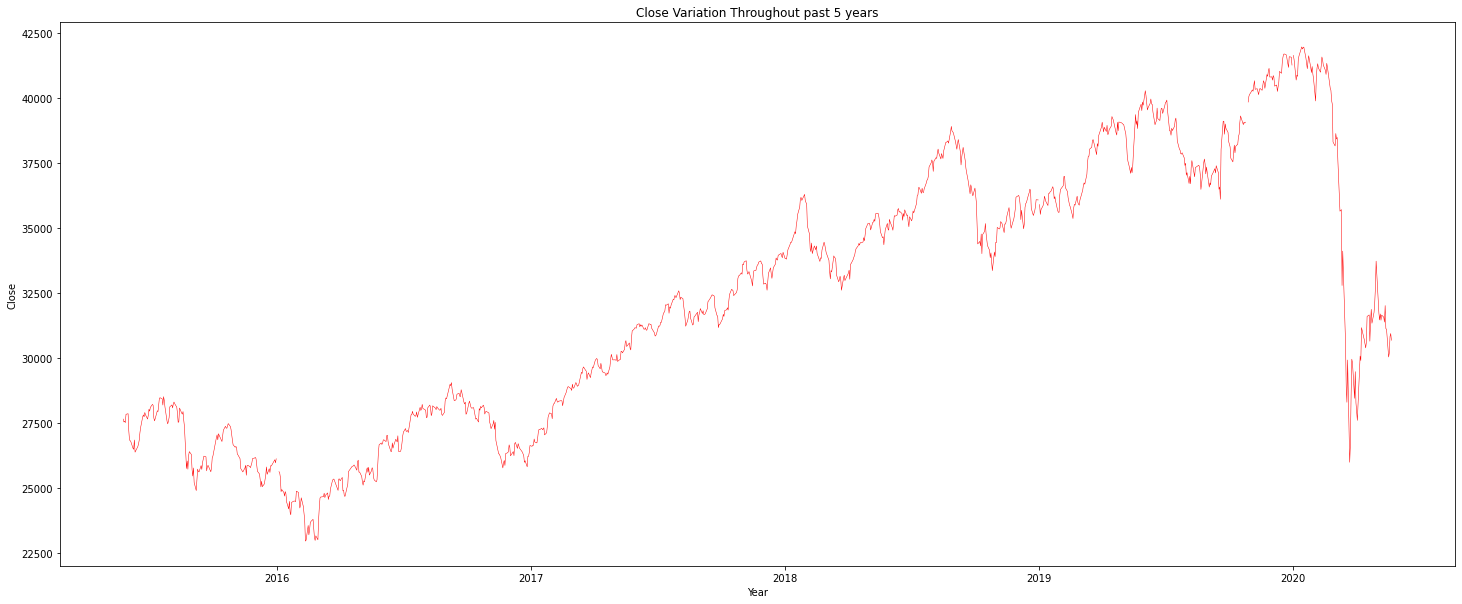

In [0]:
# We'll use 'Close' as our target variable
# Plotting Close against Date
plt.figure(figsize=(25,10))
plt.plot(bse_data['Date'], bse_data['Close'],color='red', linewidth=0.5)
plt.xlabel('Year')
plt.ylabel('Close')
plt.title('Close Variation Throughout past 5 years')
plt.show()

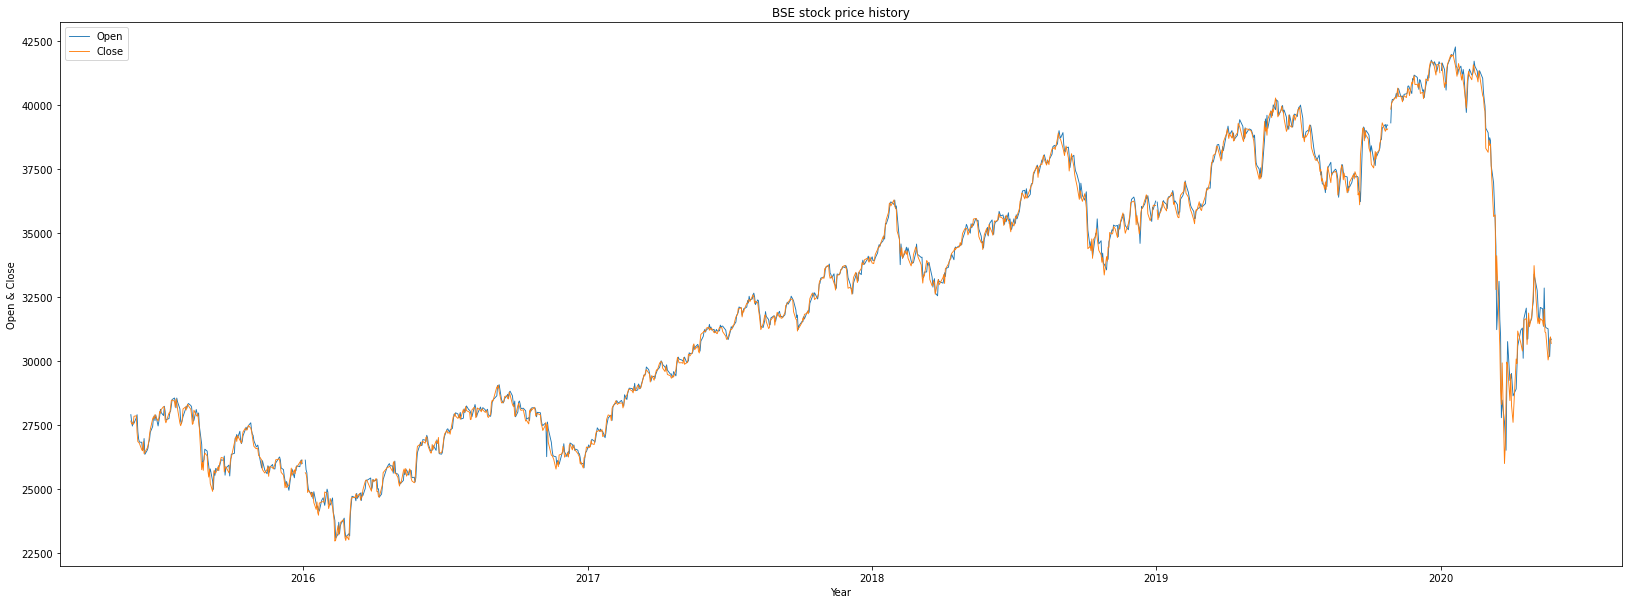

In [0]:
# plotting open & close price
plt.figure(figsize=(28,10))
plt.plot(bse_data['Date'],bse_data["Open"], linewidth=0.9)
plt.plot(bse_data['Date'],bse_data["Close"], linewidth=0.9)
plt.title('BSE stock price history')
plt.ylabel('Open & Close')
plt.xlabel('Year')
plt.legend(['Open', 'Close'], loc='upper left')
plt.show()

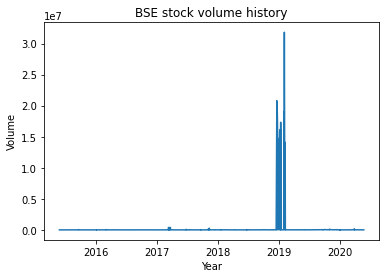

In [0]:
plt.figure()
plt.plot(bse_data["Date"], bse_data["Volume"])
plt.title('BSE stock volume history')
plt.ylabel('Volume')
plt.xlabel('Year')
plt.show()

In [0]:
print("checking if any null values are present\n", bse_data.isna().sum())

checking if any null values are present
 Date         0
Open         4
High         4
Low          4
Close        4
Adj Close    4
Volume       4
dtype: int64


In [0]:
# Dropping all rows with null values
bse_data.dropna(axis=0, how='any',inplace=True)

In [0]:
print("checking for null values again \n", bse_data.isna().sum())

checking for null values again 
 Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [0]:
#Create a new dataframe with only the 'Close' column
data = bse_data.filter(['Close'])
#Converting the dataframe to a numpy array
dataset = data.values
#Get /Compute the number of rows to train the model on
training_data_len = math.ceil( len(dataset) *.8) 

In [0]:
#Scale the all of the data to be values between 0 and 1 
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)

In [0]:
#Create the scaled training data set 
train_data = scaled_data[0:training_data_len  , : ]
#Split the data into x_train and y_train data sets
x_train=[]
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

In [0]:
#Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [0]:
#Reshape the data into the shape accepted by the LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [0]:
#Build the LSTM network model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [0]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [0]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

Epoch 1/1
921/921 [==============================] - 266s 289ms/step - loss: 0.0029


In [0]:
#Test data set
test_data = scaled_data[training_data_len - 60: , : ]
#Create the x_test and y_test data sets
x_test = []
y_test =  dataset[training_data_len : , : ] #Get all of the rows from index 1603 to the rest and all of the columns (in this case it's only column 'Close'), so 2003 - 1603 = 400 rows of data
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [0]:
#Convert x_test to a numpy array 
x_test = np.array(x_test)

In [0]:
#Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [0]:
#Getting the models predicted price values
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions)#Undo scaling

In [0]:
#Calculate/Get the value of RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

1421.5830022664536

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


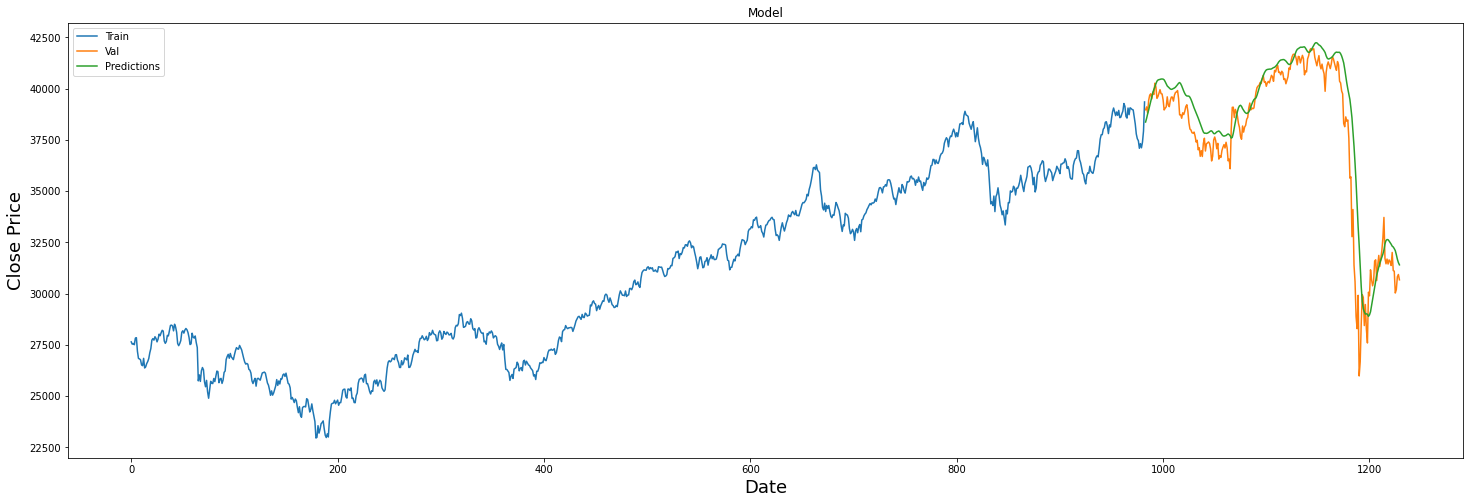

In [0]:
#Plot/Create the data for the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(25,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='upper left')
plt.show()

In [0]:
valid

,Close,Predictions
983,38969.800781,38371.074219
984,39110.210938,38553.101562
985,38811.390625,38768.425781
986,39434.718750,38959.519531
987,39683.289063,39172.960938
...,...,...
1225,30028.980469,32096.888672
1226,30196.169922,31902.578125
1227,30818.609375,31681.376953
1228,30932.900391,31514.599609
